In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from math import ceil

In [ ]:
# data
titanic = pd.read_csv("train.csv")

In [ ]:
titanic

array([[3.0, 0.0, 1.0, ..., 1, 0, 'S'],
       [57.0, 1.0, 0.0, ..., 1, 0, 'C'],
       [3.0, 1.0, 0.0, ..., 0, 0, 'S'],
       ...,
       [19.0, 1.0, 0.0, ..., 1, 2, 'S'],
       [25.0, 0.0, 1.0, ..., 0, 0, 'C'],
       [3.0, 0.0, 1.0, ..., 0, 0, 'Q']], dtype=object)

In [ ]:
# drop
titanic = titanic.drop(['Cabin', 'Name', 'PassengerId','Ticket'], axis=1)

In [ ]:
# Round ceiling for fare
titanic['Fare'] = titanic['Fare'].apply(lambda x: ceil(x))

In [ ]:
# One-hot encode sex column
sex_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [2])], remainder='passthrough')
titanic = sex_transformer.fit_transform(titanic)

In [ ]:
# Ordinal encode Embarked column
embarked_transformer = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(), [6])], remainder='passthrough')
titanic = embarked_transformer.fit_transform(titanic)

In [ ]:
# Separate features and labels
X = titanic[:, 0:-1]
y = titanic[:, -1]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
clf = svm.SVC(kernel='linear')
# Drop the rows that contain NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]

clf.fit(X_train, y_train)

# Test the model and print accuracy score
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

AttributeError: ignored

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

# Drop cabin, name, and passengerID
titanic = titanic.drop(['Cabin', 'Name', 'PassengerId','Ticket'], axis=1)

# Round ceiling for fare
titanic['Fare'] = np.ceil(titanic['Fare'])

# One hot encoding on sex column
sex_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [2])], remainder='passthrough')
titanic = sex_transformer.fit_transform(titanic)

# Ordinal encoding on Embarked column
embarked_transformer = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(), [6])], remainder='passthrough')
titanic = embarked_transformer.fit_transform(titanic)

# Fill missing values with mean for the age column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
titanic[:, 4:5] = imputer.fit_transform(titanic[:, 4:5])

# Split into X and y
X = titanic[:, :-1]
y = titanic[:, -1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test the model and print accuracy score
accuracy = clf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


ValueError: ignored

In [ ]:
import pandas as pd
import numpy  as np

np.random.seed(2018)

feature_names = ['Age','Pclass','Embarked','Sex']

# load data sets
train = pd.read_csv('train.csv', usecols =['Survived','PassengerId'] + feature_names)
test  = pd.read_csv('test.csv',  usecols =['PassengerId'] + feature_names )

# combine train and test for joint processing
test['Survived'] = np.nan
comb = pd.concat([ train, test ])
comb.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


In [ ]:
print('Number of missing Embarked values ',comb['Embarked'].isnull().sum())
comb['Embarked'] = comb['Embarked'].fillna('S')
comb['Embarked'].unique()

Number of missing Embarked values  2


array(['S', 'C', 'Q'], dtype=object)

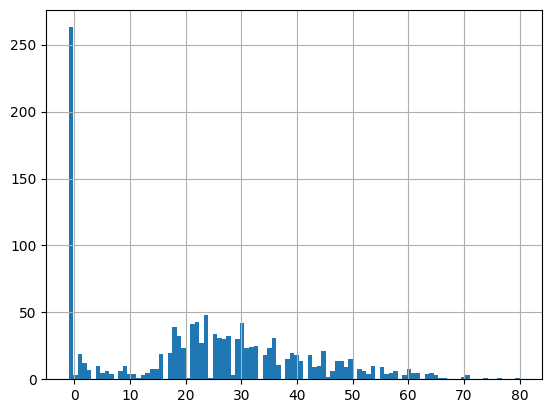

In [ ]:
comb['NoAge'] = comb['Age'] == np.NAN
comb['Age'] =  comb['Age'].fillna(-1)
comb['Age'].hist(bins=100)
comb['Minor'] = (comb['Age']<14.0)&(comb['Age']>=0)

In [ ]:
# one-hot encode Embarked
comb['1'] = comb['Embarked'] == 'S'
comb['2'] = comb['Embarked'] == 'Q'
comb['3'] = comb['Embarked'] == 'C'

In [ ]:
# Label encode Sex
comb['Sex'] = comb['Sex'].map({'male':0,'female':1})

# drop Pclass, Embarked and Age features
comb = comb.drop(columns=['Pclass','Embarked','Age'])
comb.head()

,PassengerId,Survived,Sex,NoAge,Minor,P1,P2,P3,ES,EQ,EC,1,2,3
0,1,0.0,0,False,False,False,False,True,True,False,False,True,False,False
1,2,1.0,1,False,False,True,False,False,False,False,True,False,False,True
2,3,1.0,1,False,False,False,False,True,True,False,False,True,False,False
3,4,1.0,1,False,False,True,False,False,True,False,False,True,False,False
4,5,0.0,0,False,False,False,False,True,True,False,False,True,False,False
